<a href="https://colab.research.google.com/github/thepaulapowers/footwear/blob/main/FINAL_Footwear_week_02_from_model_to_production1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻Week 2 Practice Notebook of unpackAI "DL101 Bootcamp"


## 📕 Learning Objectives

* Understand the fundamental process of building your own image classification project.

In [26]:
!pip install -Uqq fastbook

# import libraries
import fastbook

In [27]:
from fastbook import *
from fastai.vision.widgets import *
import random

In [16]:
# fastbook.setup_book()

In [28]:
from google.colab import drive

In [29]:
# Import all of the fastai.vision library.
# This gives us all of the functions and classes we will need to create a wide variety of computer vision models 
from fastai.vision.all import *

In [30]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


### Step Two: Collect and design your dataset

##### Install

In [31]:
# !pip install -q jmd_imagescraper

##### Download images

When downloading the images please make sure to check your search terms ahead of running the script below. Go and search for yourself to define the best search terms.



```
# number_images_to_download = DECIDE HOW MANY IMAGES YOU WANT TO DOWNLOAD PER CLASS.

# duckduckgo_search(path, "THIS IS YOUR LABEL", "THIS IS YOUR DuckDuckGo SEARCH TERM", max_results=DO NOT CHANGE)
```



In [35]:
pwd

'/content'

In [34]:
from pathlib import Path
from jmd_imagescraper.core import *    # dont't worry, it's designed to work with import *

ModuleNotFoundError: ignored

In [36]:
# path = Path().cwd()/"images"

number_images_to_download = 60         # this can go up to 477 at the time of writing

duckduckgo_search(path, "Heels", "Heels", max_results=number_images_to_download)
duckduckgo_search(path, "Flats", "Flats", max_results=number_images_to_download)
duckduckgo_search(path, "Trainers", "Trainers", max_results=number_images_to_download)
duckduckgo_search(path, "Boots", "Boots", max_results=number_images_to_download)

Duckduckgo search: Heels


Duckduckgo search: Flats


Duckduckgo search: Trainers


Duckduckgo search: Boots


[Path('/content/gdrive/My Drive/fastai/footwear/Boots/001_25ad9fd2.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/002_f2a826f4.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/003_f492d033.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/004_8bfe243b.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/005_58cfb09a.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/006_68553e04.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/007_0c460374.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/008_3a822f31.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/009_283ac4b7.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/010_a8606ca5.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/011_4e61272e.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/012_d3c8ea11.jpg'),
 Path('/content/gdrive/My Drive/fastai/footwear/Boots/013_e685eec9.jpg'),
 Path('/content/gdrive/My Drive/fastai

##### Displaying the image cleaner

Use this to get rid of unsuitable images without leaving your notebook.

In [36]:
path = Path('/content/gdrive/My Drive/fastai/footwear/')

In [37]:
path

Path('/content/gdrive/My Drive/fastai/footwear')

In [22]:
# from jmd_imagescraper.imagecleaner import *

# display_image_cleaner(path)

##### Create a zip to download or transfer to google drive

Replace images with a file name of your choice.

```
ZIP_NAME = "images.zip"
```



In [ ]:
# create zip

ZIP_NAME = "fashion.zip"

!rm -f {ZIP_NAME}
!zip -q -r {ZIP_NAME} {path}



```
# DESTINATION_FOLDER = "CHOOSE A FOLDER WITHIN YOUR MyDrive"
```



In [24]:
# copy to google drive 

from google.colab import drive
import shutil

DESTINATION_FOLDER = "fastai" # where would you like this in Google Drive?

drive.mount("/content/drive") 
folder = Path("/content/drive/MyDrive")/DESTINATION_FOLDER

folder.mkdir(parents=True, exist_ok=True)

# shutil.copyfile(ZIP_NAME, str(folder/ZIP_NAME))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Step Three: Create your DataLoaders and check your data.

> Hint: Make sure to define your path so that it points to your main folder that contains your labeled folders with the images. A great way to do that is to use the *folder* icon on the left, to find the right folder, right click and *copy path*.



In [38]:
# from google.colab import drive
# drive.mount('/content/drive')

In [39]:
shoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

dls = shoes.dataloaders(path)

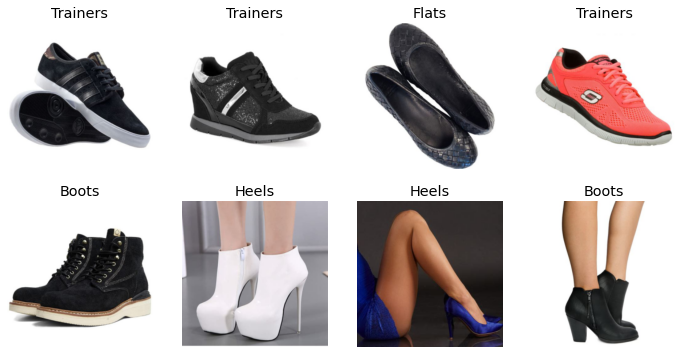

In [41]:
dls.train.show_batch(max_n=8, nrows=2, unique=False)

In [52]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(20)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.218014,2.358972,0.611111,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.188885,1.646751,0.486111,00:05
1,1.051355,1.140553,0.402778,00:05
2,0.914160,0.795218,0.305556,00:05
3,0.743328,0.595808,0.194444,00:05
4,0.609392,0.514574,0.138889,00:05
5,0.504301,0.490010,0.138889,00:05
6,0.426657,0.474328,0.138889,00:05
7,0.368166,0.456742,0.125000,00:05
8,0.322491,0.438602,0.111111,00:05
9,0.284748,0.424418,0.111111,00:05


### Step Four: Train your model & check the Performance using the confusion matrix.

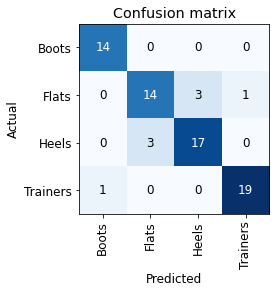

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [55]:
pwd

'/content'

In [58]:
# learn.export('/content/gdrive/My Drive/fastai/models/footwear_model_1.pkl')

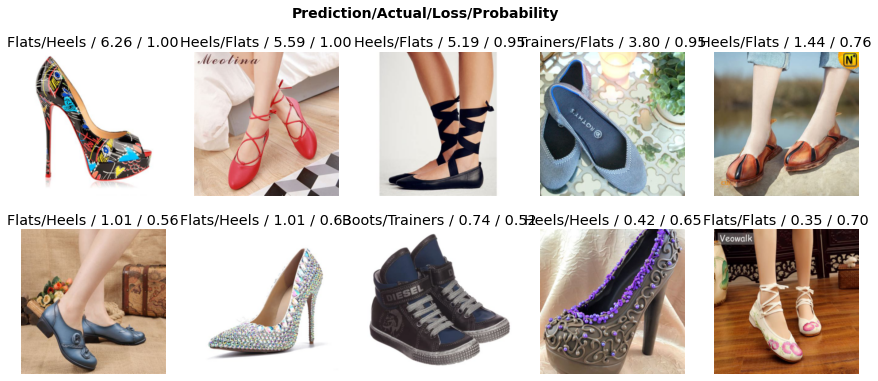

In [56]:
interp.plot_top_losses(10, nrows=2)

### Step Five: Create a notebook app to upload and classify external images.

In [59]:
learn = load_learner('/content/gdrive/My Drive/fastai/models/footwear_model_1.pkl', cpu=True)

In [60]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

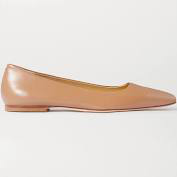

In [61]:
img = PILImage.create(btn_upload.data[-1])
img

In [62]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [63]:
pred,pred_idx,probs = learn.predict(img)

In [64]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Flats; Probability: 0.8533')

In [65]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [66]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [67]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [68]:
#hide_output
VBox([widgets.Label('Select your shoe!'), 
      btn_upload, btn_run, out_pl, lbl_pred])